In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import sys
import numpy as np

import matplotlib as mpl
sys.path.insert(1, "/home/dima/Projects/NNCompression")
from pathlib import Path
import torch.nn as nn

In [2]:
from visualization.runner_output_utils import enumerate_run_folder, filter_incomplete_runs, filter_run_folder, get_config_run_data

In [4]:
from statistics import mean

In [3]:
runs = enumerate_run_folder("/run/media/dima/Scratch/run_out/run_out/outputs/resnet18_perturb_experiment/")
runs = filter_incomplete_runs(runs)
# runs = filter_run_folder(runs, "perturb_amount", 10)
# runs = filter_run_folder(runs, "perturb_variance", 0.001)

In [8]:
dataset = []

for run in runs:
    d = runs[run]
    d_config, d_run_data = get_config_run_data(d)
    
    objective_loss = []
    perturb_loss = []
    for loss in d_run_data["train_loss"][0]:
        objective_loss.append(loss[1])
        perturb_loss.append(loss[2])

    dataset.append({
        "perturb_amount": d_config["perturb_amount"],
        "perturb_variance": d_config["perturb_variance"],
        "accuracy_test": d_run_data["test_accuracy"].iloc[-1],
        "objective_loss": mean(objective_loss),
        "perturb_loss": mean(perturb_loss)
    })

dataset = pd.DataFrame(dataset)
dataset

,perturb_amount,perturb_variance,accuracy_test,objective_loss,perturb_loss
0,15,0.00100,0.6333,3.824694,0.001851
1,4,0.01000,0.6180,3.822557,0.044115
2,10,0.00001,0.6451,3.821321,0.000019
3,1,0.00100,0.6302,3.826595,0.001840
4,15,0.05000,0.6193,3.823033,1.051883
5,5,0.00100,0.6229,3.826017,0.001914
6,1,0.01000,0.6297,3.828025,0.045221
7,3,0.50000,0.6284,3.821923,19.906340
8,1,1.00000,0.6414,3.824319,42.386681
9,4,0.00100,0.6302,3.826205,0.001853


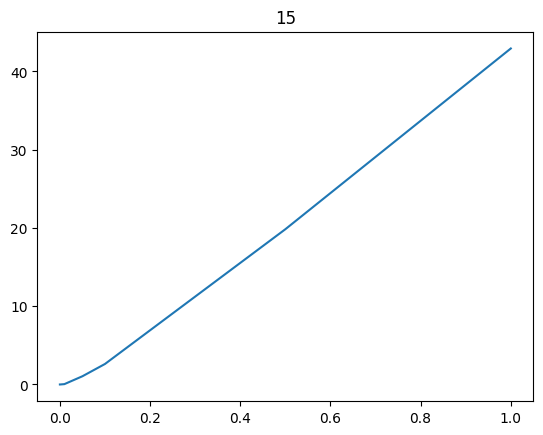

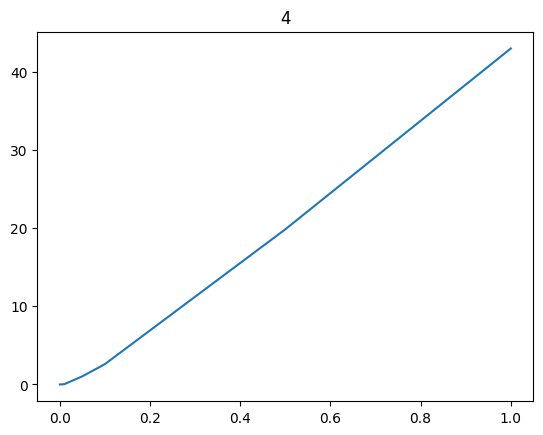

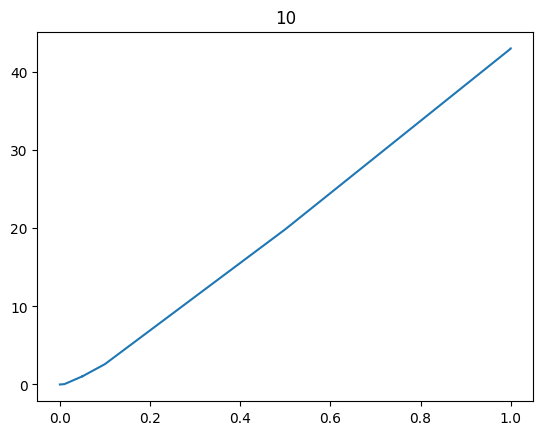

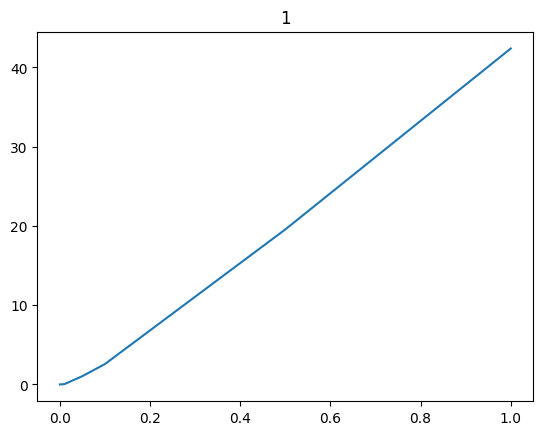

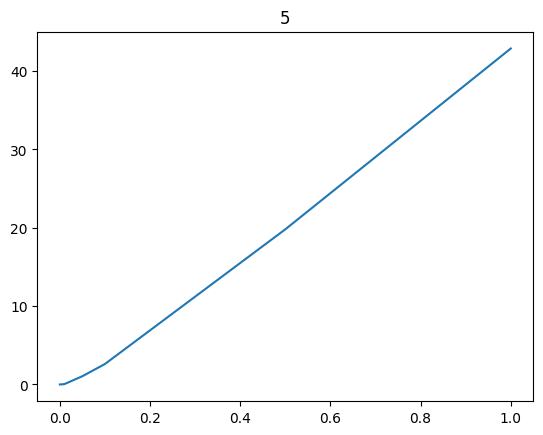

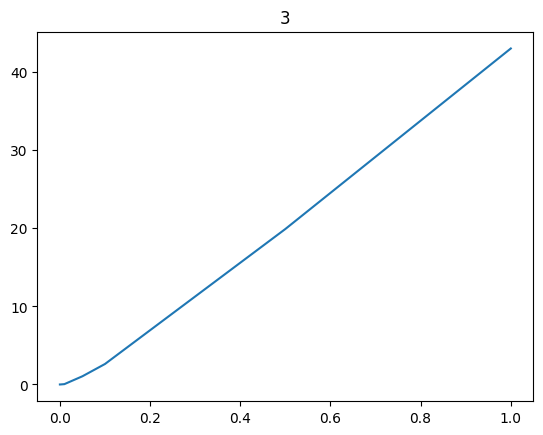

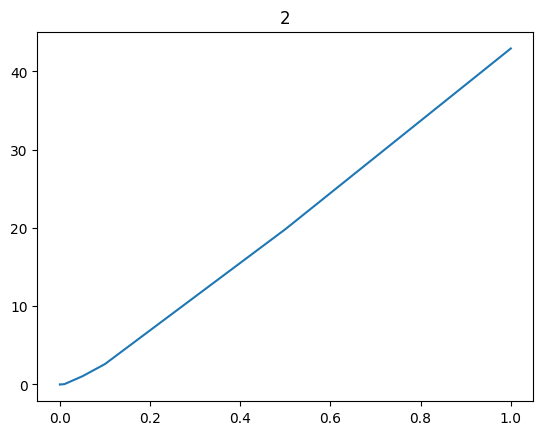

In [17]:
for p in dataset["perturb_amount"].unique():
    d = dataset[dataset["perturb_amount"] == p].sort_values("perturb_variance")
    plt.plot(d["perturb_variance"], d["perturb_loss"])
    plt.title(p)
    plt.show()

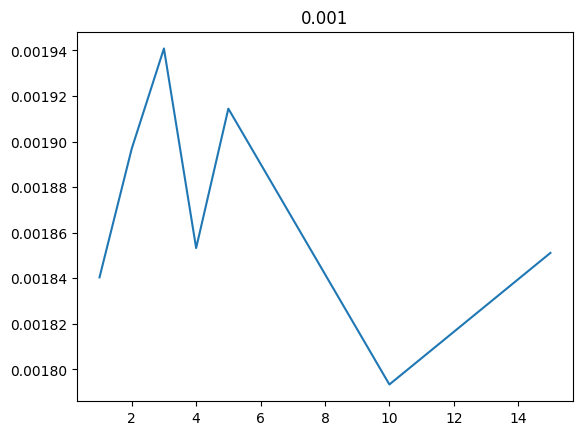

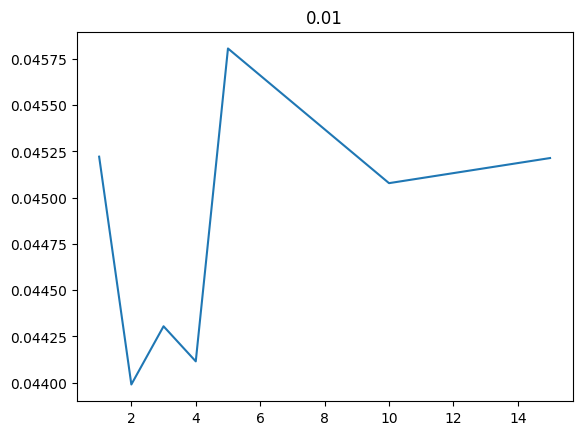

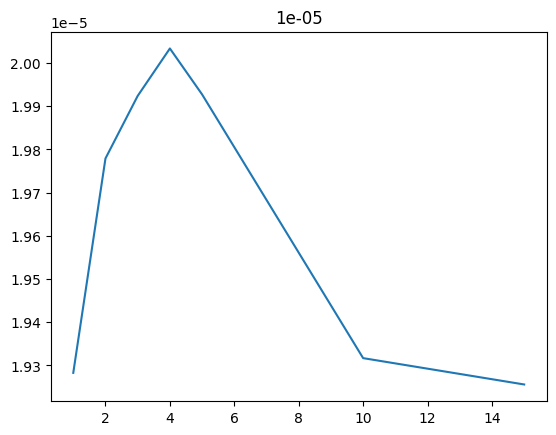

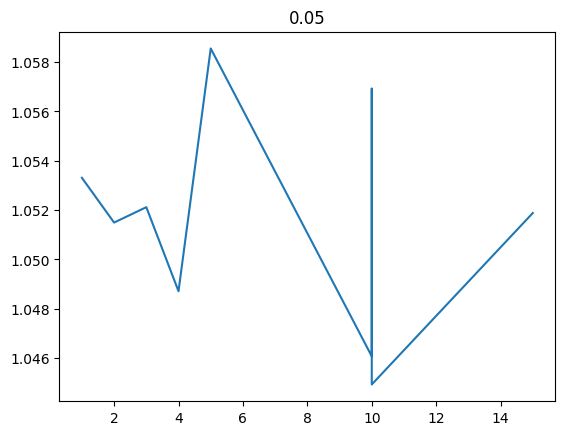

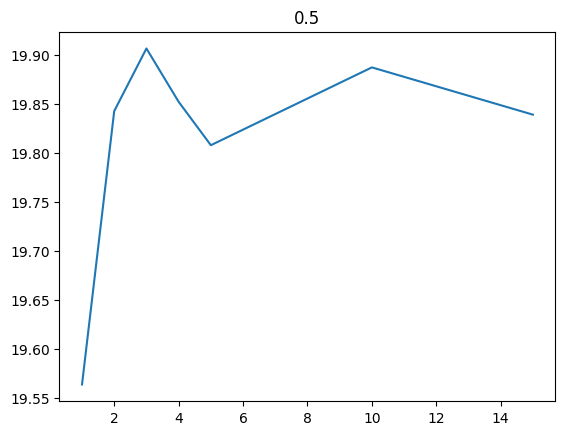

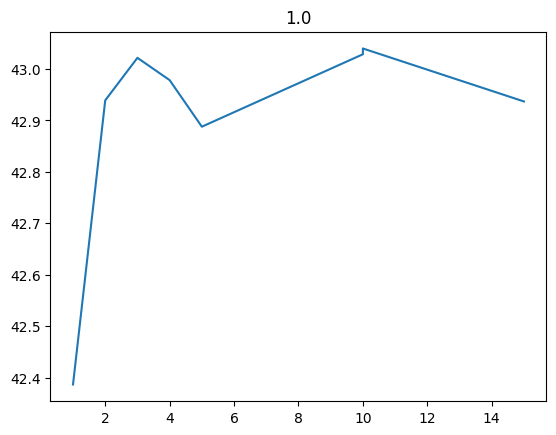

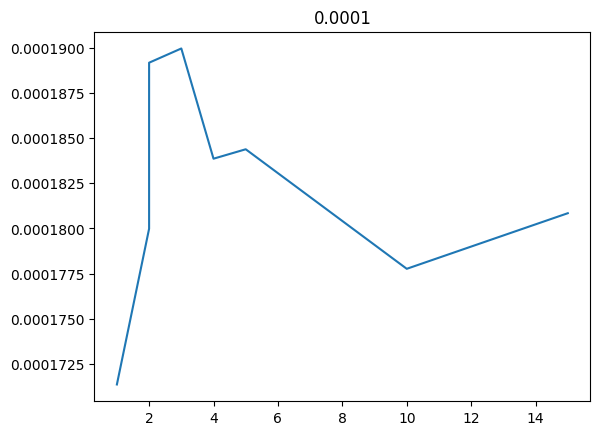

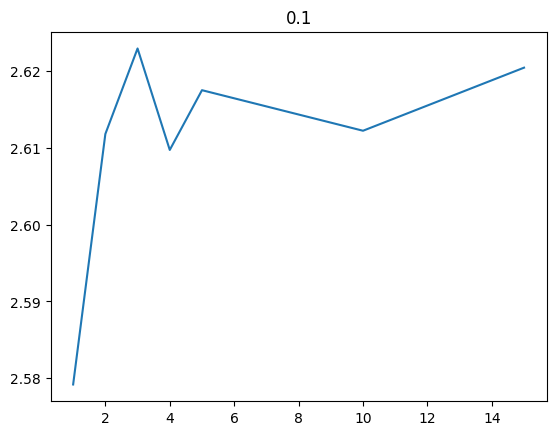

In [16]:
for p in dataset["perturb_variance"].unique():
    d = dataset[dataset["perturb_variance"] == p].sort_values("perturb_amount")
    plt.plot(d["perturb_amount"], d["perturb_loss"])
    plt.title(p)
    plt.show()

In [67]:
perturb_loss.mean()

0.0017934020947812277

In [8]:
objective_loss.mean()

3.8225569165482813